# Titanic Dataset Using H2O.ai
**By: Amr Ezzat**

## IMPORT RESOURCES

In [3]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,9 days 22 hours 54 mins
H2O_cluster_timezone:,Asia/Dubai
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.1
H2O_cluster_version_age:,25 days
H2O_cluster_name:,H2O_from_python_home_oyiep6
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.353 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [4]:
#Fetching dataset 
titanic_ds = h2o.import_file('/Users/home/Documents/Downloads/titanic.csv') 

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [3]:
#Checking the dataset was imported successfully 
titanic_ds

Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,3,Mr. Owen Harris Braund,male,22,1,0,7.25
1,1,Mrs. John Bradley (Florence Briggs Thayer) Cumings,female,38,1,0,71.2833
1,3,Miss. Laina Heikkinen,female,26,0,0,7.925
1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35,1,0,53.1
0,3,Mr. William Henry Allen,male,35,0,0,8.05
0,3,Mr. James Moran,male,27,0,0,8.4583
0,1,Mr. Timothy J McCarthy,male,54,0,0,51.8625
0,3,Master. Gosta Leonard Palsson,male,2,3,1,21.075
1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27,0,2,11.1333
1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14,1,0,30.0708


In [5]:
#Checking Number of columns and rows are correct and no missing data
titanic_ds.describe() 

Rows:887
Cols:8




,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
type,int,int,string,enum,real,int,int,real
mins,0.0,1.0,NaN,,0.42,0.0,0.0,0.0
mean,0.3855693348365276,2.3055242390078914,NaN,,29.47144306651637,0.5253664036076668,0.38331454340473503,32.30542018038329
maxs,1.0,3.0,NaN,,80.0,8.0,6.0,512.3292
sigma,0.4870041177510124,0.8366620036697728,NaN,,14.121908405462552,1.104668553867569,0.8074659070316833,49.78204040017391
zeros,545,0,0,,0,604,674,15
missing,0,0,0,0,0,0,0,0
0,0.0,3.0,Mr. Owen Harris Braund,male,22.0,1.0,0.0,7.25
1,1.0,1.0,Mrs. John Bradley (Florence Briggs Thayer) Cumings,female,38.0,1.0,0.0,71.2833
2,1.0,3.0,Miss. Laina Heikkinen,female,26.0,0.0,0.0,7.925


## DATA PREPARATION

In [5]:
#Converting Survived data type because h2o.ai recognise that this is a 
#classification model.

titanic_ds["Survived"]= titanic_ds["Survived"].asfactor()

In [8]:
#Checking if survived was successfully converted
titanic_ds.types

{'Survived': 'enum',
 'Pclass': 'int',
 'Name': 'string',
 'Sex': 'enum',
 'Age': 'real',
 'Siblings/Spouses Aboard': 'int',
 'Parents/Children Aboard': 'int',
 'Fare': 'real'}

## TRAIN TEST SPLIT

In [9]:
#Splitting data 80% training data 20% test data
t_train,t_test= titanic_ds.split_frame(ratios=[.8])

In [10]:
#Arrange data (Remove'Survived', set 'Survived' as the value I 
#want to predict)
y = "Survived"
x = titanic_ds.columns
x.remove(y)

In [14]:
#Checking the split was done properly
t_train.describe()

Rows:709
Cols:8




,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
type,enum,int,string,enum,real,int,int,real
mins,,1.0,NaN,,0.42,0.0,0.0,0.0
mean,,2.2976022566995753,NaN,,29.50246826516218,0.5119887165021163,0.35966149506346945,32.57449379407622
maxs,,3.0,NaN,,74.0,8.0,6.0,512.3292
sigma,,0.8371713233428791,NaN,,13.996756524025393,1.0517325603039858,0.7876934062195242,50.11122601993103
zeros,,0,0,,0,479,550,12
missing,0,0,0,0,0,0,0,0
0,1,1.0,Mrs. John Bradley (Florence Briggs Thayer) Cumings,female,38.0,1.0,0.0,71.2833
1,1,1.0,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1.0,0.0,53.1
2,0,3.0,Mr. William Henry Allen,male,35.0,0.0,0.0,8.05


## H2O.ai

In [16]:
aml = H2OAutoML(max_models = 40, seed = 45, verbosity="info")
aml.train(x=x, y=y, training_frame=t_train)

AutoML progress: |
17:35:36.909: Project: AutoML_20210417_173536909
17:35:36.909: Setting stopping tolerance adaptively based on the training frame: 0.037555788309433985
17:35:36.909: Build control seed: 45
17:35:36.909: training frame: Frame key: automl_training_py_3_sid_a01a    cols: 8    rows: 709  chunks: 1    size: 29724  checksum: 7612975062755164824
17:35:36.909: validation frame: NULL
17:35:36.909: leaderboard frame: NULL
17:35:36.909: blending frame: NULL
17:35:36.909: response column: Survived
17:35:36.910: fold column: null
17:35:36.910: weights column: null
17:35:36.910: Loading execution steps: [{XGBoost : defaults}, {GLM : defaults}, {DRF : [def_1]}, {GBM : defaults}, {DeepLearning : defaults}, {DRF : [XRT]}, {XGBoost : grids}, {GBM : grids}, {DeepLearning : grids}, {GBM : [lr_annealing]}, {XGBoost : [lr_search]}, {StackedEnsemble : defaults}]
17:35:36.910: AutoML job created: 2021.04.17 17:35:36.909
17:35:36.911: AutoML build started: 2021.04.17 17:35:36.911
17:35:36.912

## RESULTS

In [17]:
#Leaderboard
lb = aml.leaderboard
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_AutoML_20210417_173536,0.890638,0.378189,0.875546,0.157906,0.338779,0.114771
DeepLearning_grid__1_AutoML_20210417_173536_model_3,0.888089,0.407762,0.866826,0.172933,0.355935,0.12669
StackedEnsemble_AllModels_AutoML_20210417_173536,0.887646,0.377915,0.878127,0.156692,0.339394,0.115188
DeepLearning_grid__3_AutoML_20210417_173536_model_2,0.886457,0.383638,0.875343,0.166494,0.342092,0.117027
DeepLearning_grid__2_AutoML_20210417_173536_model_1,0.885001,0.396024,0.875318,0.169974,0.348041,0.121132
DeepLearning_grid__3_AutoML_20210417_173536_model_1,0.884421,0.388225,0.876058,0.174039,0.345119,0.119107
DeepLearning_grid__1_AutoML_20210417_173536_model_1,0.883949,0.409043,0.872184,0.177807,0.350483,0.122838
GBM_1_AutoML_20210417_173536,0.883761,0.393244,0.862019,0.162555,0.344727,0.118837
XGBoost_grid__1_AutoML_20210417_173536_model_5,0.882639,0.40207,0.86674,0.158436,0.344933,0.118979
XGBoost_grid__1_AutoML_20210417_173536_model_2,0.880256,0.396911,0.869053,0.159363,0.344067,0.118382


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_BestOfFamily_AutoML_20210417_173536,0.890638,0.378189,0.875546,0.157906,0.338779,0.114771,244,0.064784,StackedEnsemble
DeepLearning_grid__1_AutoML_20210417_173536_model_3,0.888089,0.407762,0.866826,0.172933,0.355935,0.12669,15150,0.018266,DeepLearning
StackedEnsemble_AllModels_AutoML_20210417_173536,0.887646,0.377915,0.878127,0.156692,0.339394,0.115188,476,0.097563,StackedEnsemble
DeepLearning_grid__3_AutoML_20210417_173536_model_2,0.886457,0.383638,0.875343,0.166494,0.342092,0.117027,27600,0.034123,DeepLearning
DeepLearning_grid__2_AutoML_20210417_173536_model_1,0.885001,0.396024,0.875318,0.169974,0.348041,0.121132,33946,0.024056,DeepLearning
DeepLearning_grid__3_AutoML_20210417_173536_model_1,0.884421,0.388225,0.876058,0.174039,0.345119,0.119107,53678,0.031938,DeepLearning
DeepLearning_grid__1_AutoML_20210417_173536_model_1,0.883949,0.409043,0.872184,0.177807,0.350483,0.122838,9499,0.010703,DeepLearning
GBM_1_AutoML_20210417_173536,0.883761,0.393244,0.862019,0.162555,0.344727,0.118837,93,0.01663,GBM
XGBoost_grid__1_AutoML_20210417_173536_model_5,0.882639,0.40207,0.86674,0.158436,0.344933,0.118979,60,0.007425,XGBoost
XGBoost_grid__1_AutoML_20210417_173536_model_2,0.880256,0.396911,0.869053,0.159363,0.344067,0.118382,73,0.007181,XGBoost


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_BestOfFamily_AutoML_20210417_173536


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5373729315781005: 


,,0,1,Error,Rate
0,0,423.0,8.0,0.0186,(8.0/431.0)
1,1,38.0,240.0,0.1367,(38.0/278.0)
2,Total,461.0,248.0,0.0649,(46.0/709.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

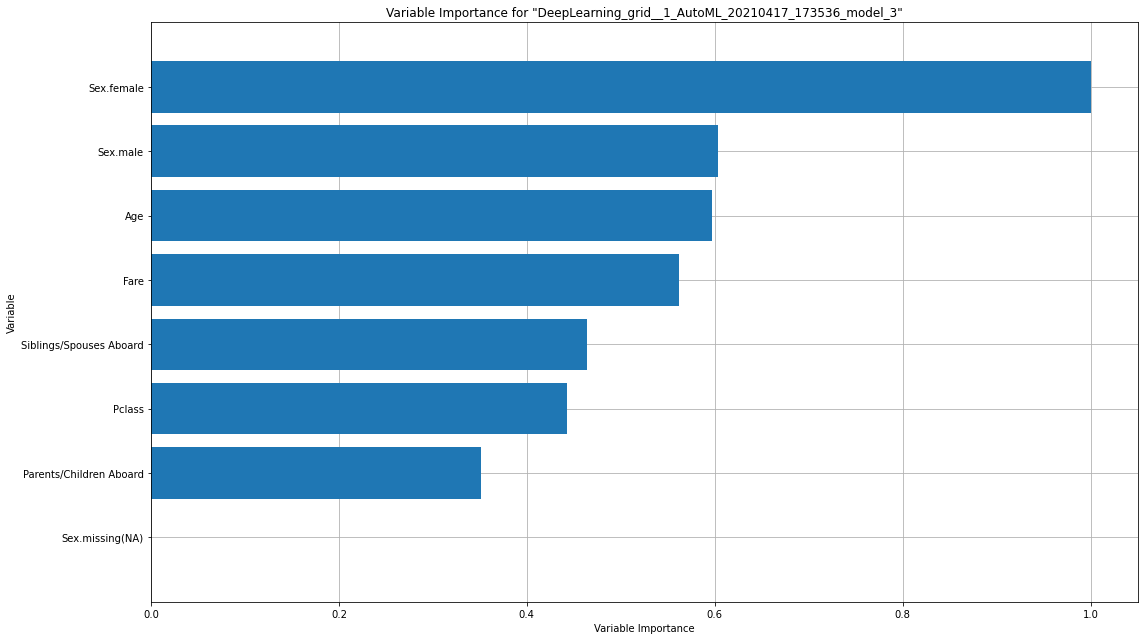

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

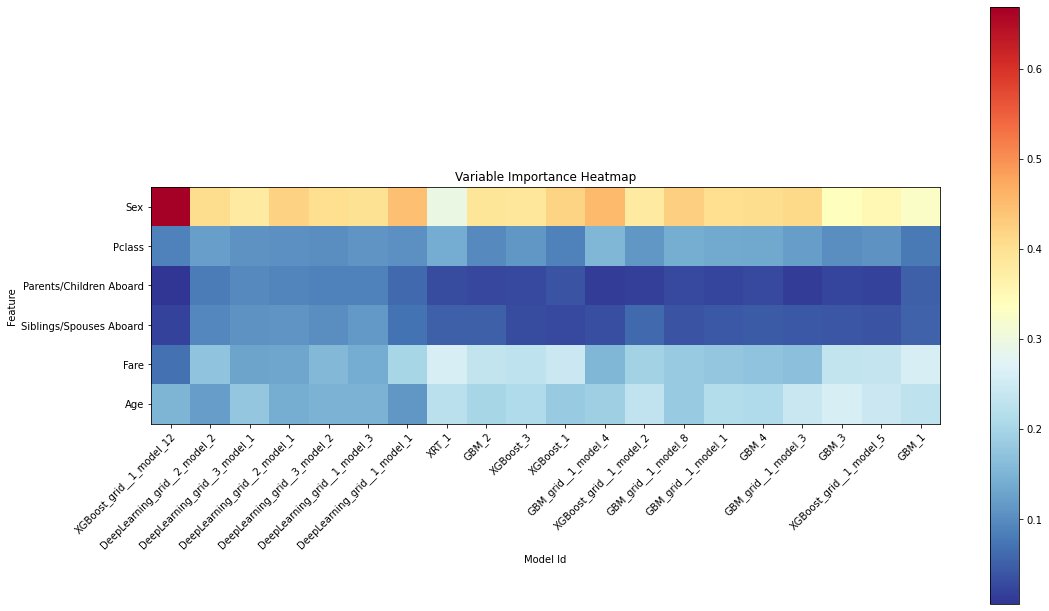

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

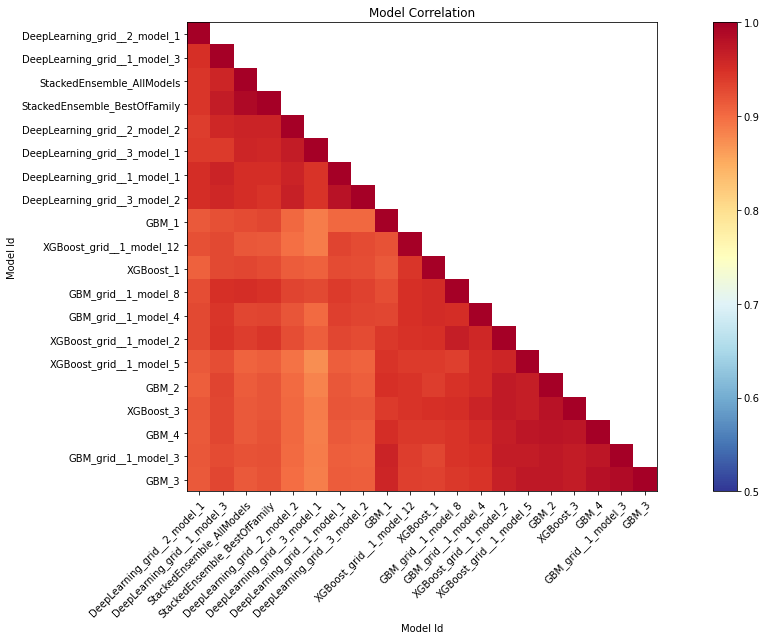

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

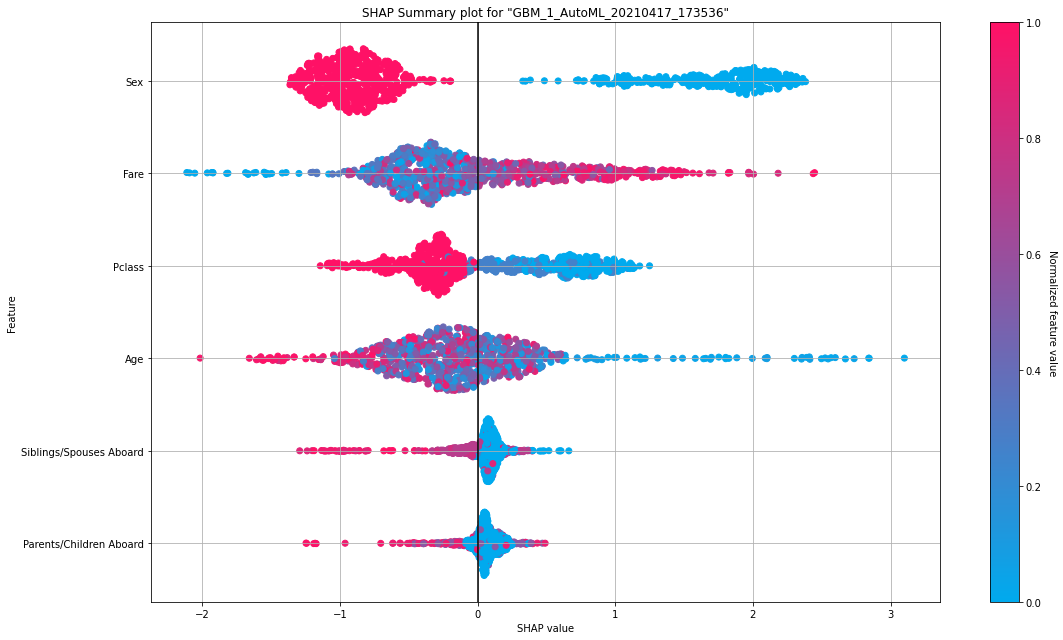

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

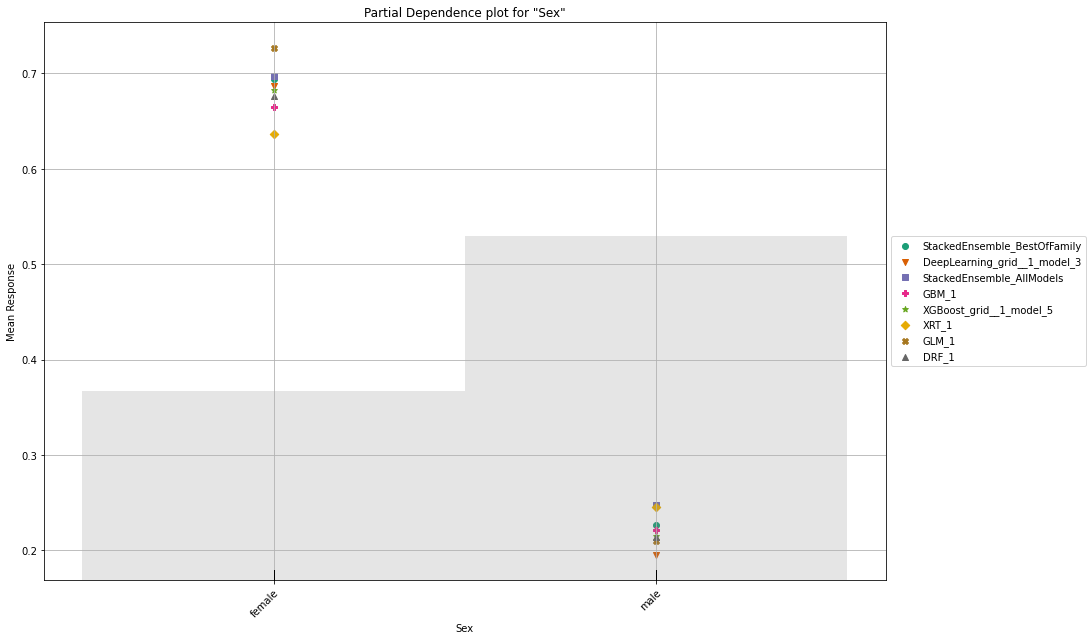

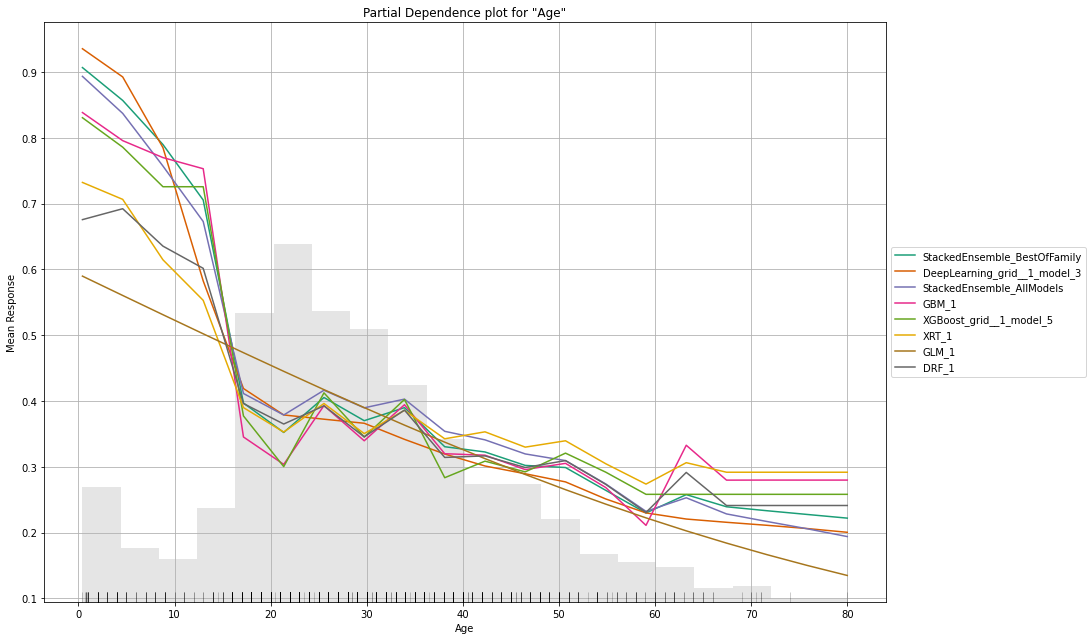

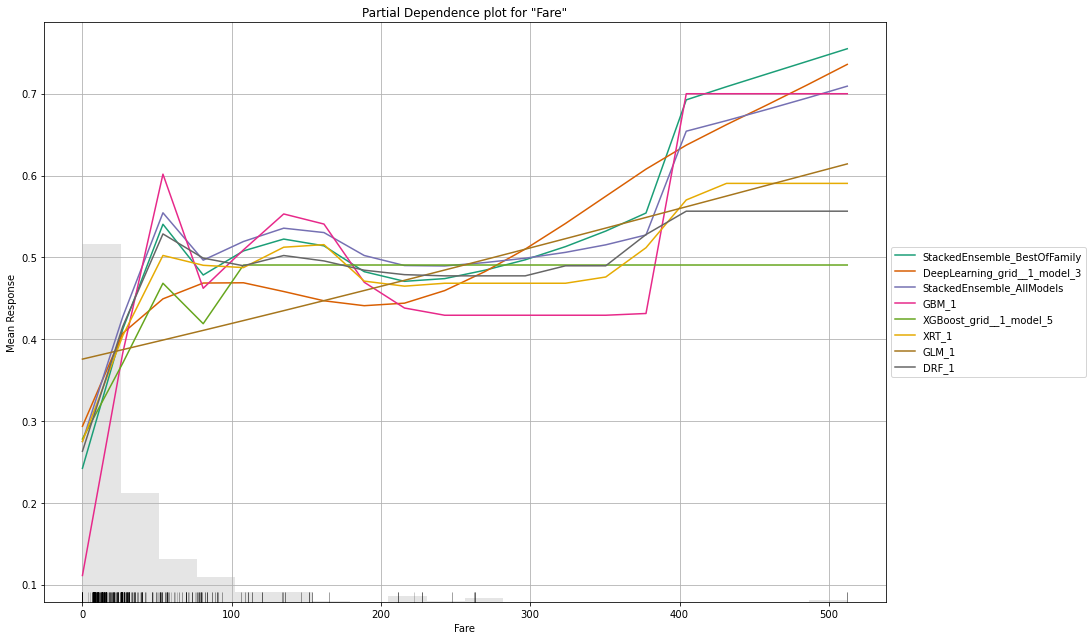

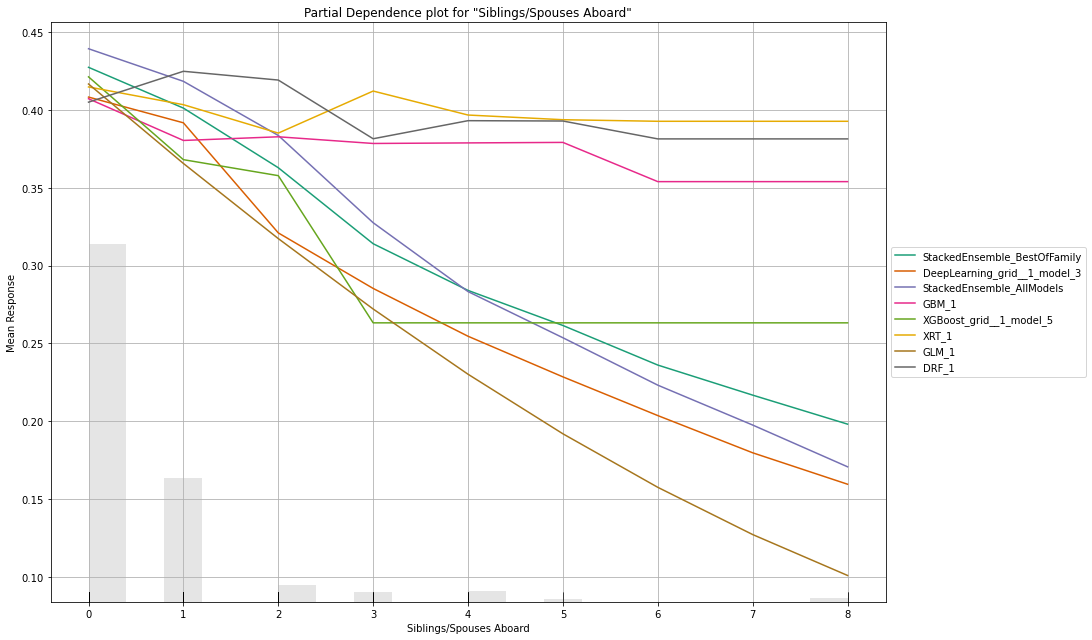

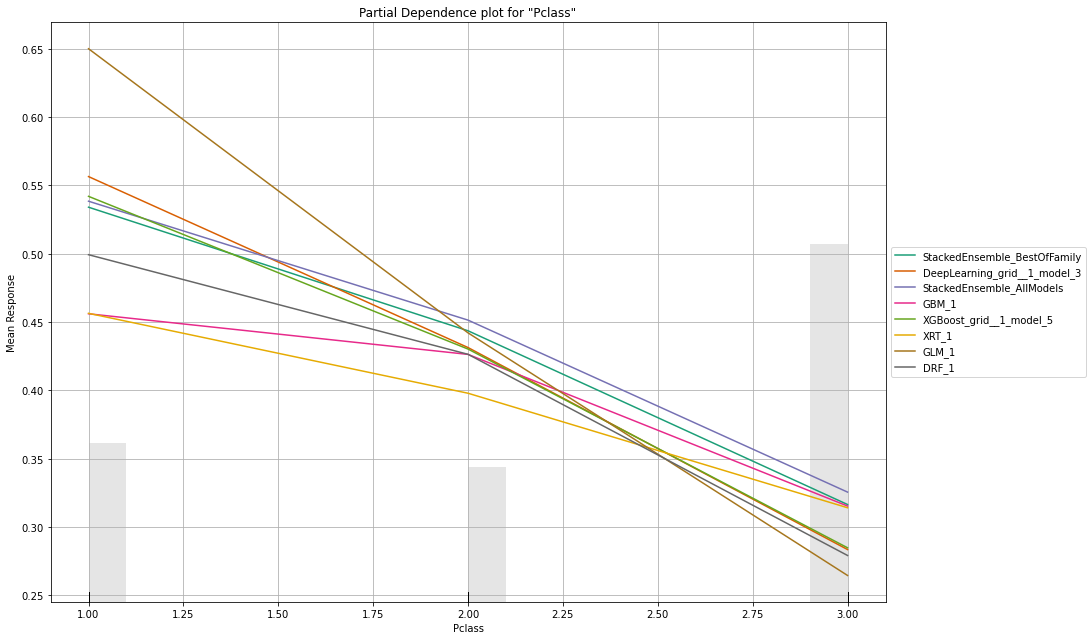

In [18]:
exa = aml.explain(titanic_ds)


In [22]:
perf= aml.leader.model_performance(titanic_ds)
perf


ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.08533097445487804
RMSE: 0.29211465977399703
LogLoss: 0.29989222917165737
Null degrees of freedom: 886
Residual degrees of freedom: 883
Null deviance: 1182.9290440905115
Residual deviance: 532.00881455052
AIC: 540.00881455052
AUC: 0.9395058747786899
AUCPR: 0.9261630538819909
Gini: 0.8790117495573797

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5369764771033658: 


,,0,1,Error,Rate
0,0,524.0,21.0,0.0385,(21.0/545.0)
1,1,63.0,279.0,0.1842,(63.0/342.0)
2,Total,587.0,300.0,0.0947,(84.0/887.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.536976,0.869159,150.0
1,max f2,0.153703,0.874200,278.0
2,max f0point5,0.553326,0.908190,146.0
3,max accuracy,0.536976,0.905299,150.0
4,max precision,0.999970,1.000000,0.0
5,max recall,0.006332,1.000000,393.0
6,max specificity,0.999970,1.000000,0.0
7,max absolute_mcc,0.536976,0.799644,150.0
8,max min_per_class_accuracy,0.328719,0.865497,205.0
9,max mean_per_class_accuracy,0.536976,0.888629,150.0



Gains/Lift Table: Avg response rate: 38.56 %, avg score: 39.69 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010147,0.998492,2.593567,2.593567,1.000000,0.999039,1.000000,0.999039,0.026316,0.026316,159.356725,159.356725,0.026316
1,2,0.020293,0.997870,2.593567,2.593567,1.000000,0.998220,1.000000,0.998629,0.026316,0.052632,159.356725,159.356725,0.052632
2,3,0.030440,0.997527,2.593567,2.593567,1.000000,0.997723,1.000000,0.998327,0.026316,0.078947,159.356725,159.356725,0.078947
3,4,0.040586,0.996713,2.593567,2.593567,1.000000,0.997023,1.000000,0.998001,0.026316,0.105263,159.356725,159.356725,0.105263
4,5,0.050733,0.995743,2.593567,2.593567,1.000000,0.996225,1.000000,0.997646,0.026316,0.131579,159.356725,159.356725,0.131579
5,6,0.100338,0.987111,2.534623,2.564426,0.977273,0.991829,0.988764,0.994770,0.125731,0.257310,153.462254,156.442605,0.255475
6,7,0.149944,0.953394,2.475678,2.535066,0.954545,0.969260,0.977444,0.986331,0.122807,0.380117,147.567783,153.506573,0.374612
7,8,0.200676,0.913658,2.478298,2.520714,0.955556,0.932150,0.971910,0.972633,0.125731,0.505848,147.829760,152.071424,0.496674
8,9,0.299887,0.642474,2.357788,2.466814,0.909091,0.778974,0.951128,0.908566,0.233918,0.739766,135.778841,146.681396,0.715913
9,10,0.400225,0.370774,1.194789,2.147912,0.460674,0.509040,0.828169,0.808403,0.119883,0.859649,19.478941,114.791203,0.747723


In [23]:
perf.auc()

0.9395058747786899

In [25]:
aml.leader.download_mojo(path = "/Users/home/Documents/Downloads/")

'/Users/home/Documents/Downloads/StackedEnsemble_BestOfFamily_AutoML_20210417_173536.zip'